# Import

In [1]:
import pyramses
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
from matplotlib import rc
import pandas as pd
import datetime
import seaborn as sns
import os

# Functions

In [2]:
def save_figure(fig, directory, fig_name):
    str_i = "" 
    i = 0
    while True:
        if not os.path.exists(directory + fig_name + str_i + '.png'):
            fig.savefig(directory + fig_name + str_i + '.png',bbox_inches='tight', dpi = 300)
            
            break
        else:
            i += 1
            str_i = " " + str(i) 

# Plot options

In [3]:
# Set plot options
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
cm = 1/2.54
pt = 1/72.27
sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
palette1 = ["#1269b0","#a8322d",'#edb120','#72791c', "#91056a", '#6f6f64', '#007a96', '#1f407a','#485a2c']
palette = ["#1269b0","#a8322d", "#91056a", '#edb120','#72791c', '#6f6f64', '#007a96', '#1f407a','#485a2c']
sns.set_palette(palette1)

# Data options

In [4]:
# TIME DOMAIN PLOTS
today = datetime.date.today() 
# today = '2022-03-07'
directory = ".\\" +  str(today) + "\\"
# directory = ".\\2022-03-04\\"
fig_name = 'Loads 18'
buses = ['N1', 'N11','N15' ,'N16', 'N17', 'N18']
atls = ['TL1', 'TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 

names = ['out']
types = atls
variables = ['time [s]', '$f$ [Hz]', '$v$ [p.u.]', '$p_\mathrm{ATL}$ [p.u.]','$q_\mathrm{ATL}$ [p.u.]' ]

events_test = {
    '$^1$': 2,
    '$^2$': 2.05,
    '$^3$': 2.1,
    '$^4$': 2.15,
    '$^5$': 3.45,
    '$^6$': 3.70,
    # '4': 3.1
}
events_right = {
    '$P$\ step change': 2,
    '$LoE = -1$': 2.1,
    # '$LoE = -3$, \n$V_s = -4$': 2.5,
    # '$LoE = -2$, \n$P_s = -1$': 3,
    # '$V_s = 0$': 3.5,
}
parameters_left = '\n'.join(('$H = 1.5$ s',
                             '$\Delta P = 1.5$ MW',
                             # "ATLs' load share = 20\%"
                            ))
parameters_right = '\n'.join(('$H = 1.5$ s',
                              '$\Delta P = 0.25$ MW',
                              # "ATLs' load share $= 15\%$"
                             ))

# Data extraction

In [5]:
ext = {}
data = pd.DataFrame()
# for typ in types:
#     ext[typ] = pyramses.extractor(directory + typ + ".trj")

    
ext = {}
A = []
B = []
C = variables*6
D = []
for name in names:
    for var in variables:
        for typ in types:
            A += [name]
for name in names:
    for typ in types:
        for var in variables:
            B += [typ]

for name in names:
    for i, typ in enumerate(types):
        filename = name 
        ext[filename] = pyramses.extractor(directory + filename + ".trj")
        D.append(ext[filename].getSync('G').S.time)
        D.append(ext[filename].getSync('G').S.value*50)
        D.append(ext[filename].getBus(buses[i]).mag.value)
        D.append(ext[filename].getInj(typ).Punit.value)
        D.append(ext[filename].getInj(typ).Qunit.value)

df = pd.DataFrame(zip(A, B, C, D), columns=['name','type', 'value','data'])
df.set_index(['name', 'type', 'value'], inplace=True)
df

data
name type value                                                                     
out  TL1  time [s]                 [0.0, 0.0001, 0.0001, 0.0002, 0.0052, 0.0102, ...
          $f$ [Hz]                 [50.0, 50.0, 50.0, 50.0, 50.00000000000021, 50...
          $v$ [p.u.]               [0.9983204999999999, 0.9983204999999999, 0.998...
          $p_\mathrm{ATL}$ [p.u.]  [0.7916666666666666, 0.7916666666666665, 0.791...
          $q_\mathrm{ATL}$ [p.u.]  [-1.1293772630057339e-19, 6.0265029847103e-18,...
     TL11 time [s]                 [0.0, 0.0001, 0.0001, 0.0002, 0.0052, 0.0102, ...
          $f$ [Hz]                 [50.0, 50.0, 50.0, 50.0, 50.00000000000021, 50...
          $v$ [p.u.]               [0.9820864, 0.9820864, 0.9820864, 0.9820864, 0...
          $p_\mathrm{ATL}$ [p.u.]  [0.33968253968253975, 0.33968253968253975, 0.3...
          $q_\mathrm{ATL}$ [p.u.]  [-0.0, 5.830916186034101e-19, 5.83091618603410...
     TL15 time [s]                 [0.0, 0.0001, 0.0001, 0.0002, 0.0052, 0.0102, ...
          $f$ [Hz]                 [50.0, 50.0, 50.0, 50.0, 50.00000000000021, 50...
          $v$ [p.u.]               [0.9499659, 0.9499659, 0.9499659, 0.9499659, 0...
          $p_\mathrm{ATL}$ [p.u.]  [0.823809523809524, 0.823809523809524, 0.82380...
          $q_\mathrm{ATL}$ [p.u.]  [-0.0, 3.993184628292197e-18, 3.99318462829219...
     TL16 time [s]                 [0.0, 0.0001, 0.0001, 0.0002, 0.0052, 0.0102, ...
          $f$ [Hz]                 [50.0, 50.0, 50.0, 50.0, 50.00000000000021, 50...
          $v$ [p.u.]               [0.9482376999999999, 0.9482376999999999, 0.948...
          $p_\mathrm{ATL}$ [p.u.]  [0.6634920634920635, 0.6634920634920636, 0.663...
          $q_\mathrm{ATL}$ [p.u.]  [-0.0, -1.1428922199746532e-18, -1.14289221997...
     TL17 time [s]                 [0.0, 0.0001, 0.0001, 0.0002, 0.0052, 0.0102, ...
          $f$ [Hz]                 [50.0, 50.0, 50.0, 50.0, 50.00000000000021, 50...
          $v$ [p.u.]               [0.9545788000000001, 0.9545788000000001, 0.954...
          $p_\mathrm{ATL}$ [p.u.]  [0.3952380952380952, 0.3952380952380952, 0.395...
          $q_\mathrm{ATL}$ [p.u.]  [5.377986966693971e-19, 2.0033838534315852e-19...
     TL18 time [s]                 [0.0, 0.0001, 0.0001, 0.0002, 0.0052, 0.0102, ...
          $f$ [Hz]                 [50.0, 50.0, 50.0, 50.0, 50.00000000000021, 50...
          $v$ [p.u.]               [0.9515168000000002, 0.9515168000000002, 0.951...
          $p_\mathrm{ATL}$ [p.u.]  [0.5666666666666667, 0.5666666666666664, 0.566...
          $q_\mathrm{ATL}$ [p.u.]  [-0.0, 6.794847040661613e-18, 6.79484704066161...

# Plotting

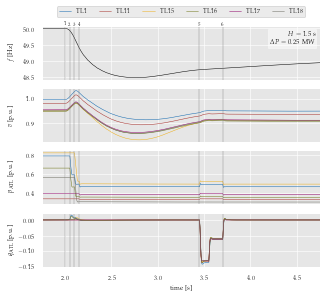

In [8]:
fig,axs = plt.subplots(4,1, figsize = (360*pt,4*80*pt), sharex='col', sharey = False)
# fig.suptitle("\detokenize{"+ fig_title +"}")
fig.subplots_adjust(hspace=0.15, wspace = 0.05)
axs = axs.ravel()
sns.lineplot(ax=axs[0], y=variables[1], x=variables[0], data=df['data']['out']['TL1'],linewidth=0.5, label=typ, legend = False, color = 'black')
for typ in types:
    # sns.lineplot(ax=axs[0], y=variables[1], x=variables[0], data=df['data']['active'][typ],linewidth=0.5, label=typ, legend = False)
    sns.lineplot(ax=axs[1], y=variables[2], x=variables[0], data=df['data']['out'][typ],linewidth=0.5, label=typ, legend = False)
    sns.lineplot(ax=axs[2], y=variables[3], x=variables[0], data=df['data']['out'][typ],linewidth=0.5, label=typ, legend = False)
    sns.lineplot(ax=axs[3], y=variables[4], x=variables[0], data=df['data']['out'][typ],linewidth=0.5, label=typ, legend = False)

# for event, time in events_left.items():  
#     for ax in axs[0],axs[2]:
#         ax.axvline(x = time, color = 'grey', linewidth=0.5)
    # axs[0].text(time+0.05, 50, event) # to correct the height for the data present.
for event, time in events_test.items():  
    for ax in axs[0],axs[2],axs[1],axs[3]:
        ax.axvline(x = time, color = 'grey', linewidth=0.4)
    axs[0].text(time, 50.17, event, va = 'top', ha = 'center') # to correct the height for the data present.
# axs[2].set_xlim([1.75,5.25])    
axs[0].set_xlim([1.75,4.75])   
# axs[0].set_ylim([48.15,50.2])   
axs[0].set_yticks(np.arange(48.5,50.01,0.5))
fig.align_ylabels(axs[:])
axs[1].legend(loc = 'upper center', bbox_to_anchor=(0.5, 2.57), ncol=len(types))
# axs[0].set_title('Weak grid')
# axs[1].set_title('Strong grid')

props = dict(boxstyle='square', facecolor='white', alpha=0.5)
# axs[0].text(0.98, 0.95,parameters_left, bbox=props, transform=axs[0].transAxes, ha = 'right', va = 'top')
# axs[0].text(0.99, 0.95,parameters_right, bbox=props, transform=axs[0].transAxes, ha = 'right', va = 'top')
axs[0].text(0.98, 0.9,parameters_right, bbox=props, transform=axs[0].transAxes, ha = 'right', va = 'top')

save_figure(fig, directory, fig_name)




In [7]:
# names = ['SC_atl_noDroop']
# # Loop over some different simulation results stored in different trj files
# fig1, (ax2,ax3,ax4) = plt.subplots(3,1, figsize =(9*cm,12.5*cm), sharex=True) 

# for name in names:
#     # Plot results for changing load factor
#     ext = pyramses.extractor(out_dir+name+".trj")
#     data = pd.DataFrame(data = ext.getSync('G').S.time-2, columns=["time"])
# #     data["pt"] = ext.getBranch('TxMAIN').PF.value*1000
#     data["wm"] = ext.getInj('TL11').wm.value
#     data["patl"] = ext.getInj('TL11').P.value*1000
#     data["f"] = ext.getSync('G').S.value*50
# #     ax1 = sns.lineplot(ax=ax1, y="pt", x="time", data=data,linewidth=0.5)
#     ax2 = sns.lineplot(ax=ax2, y="wm", x="time", data=data,linewidth=0.5)
#     ax3 = sns.lineplot(ax=ax3, y="patl", x="time", data=data,linewidth=0.5)
#     ax4 = sns.lineplot(ax=ax4, y="f", x="time", data=data,linewidth=0.5)
    
#     # Plot results for ATL Share


# # Axis labels
# # ax1.set_ylabel(r'$P_t$ in kW')
# ax2.set_ylabel(r'$\omega_m$ in p.u.')
# ax3.set_ylabel(r'$P_{atl}$ in kW')
# ax4.set_ylabel(r'$f$ in Hz')
# ax4.set_xlabel(r"time in s")


# # Axis limits
# # ax1.set_xlim([-0.25,5.25])
# ax2.set_xlim([-0.25,5.25])
# ax3.set_xlim([-0.25,5.25])
# ax4.set_xlim([-0.25,5.25])

# #     #Add labels to each plot
# #     props = dict(boxstyle='square', facecolor='white', alpha=0.5)

# #     ax1.text(0.98, 0.1,'load factor changes', bbox=props, transform=ax1.transAxes, ha = 'right', va='bottom')
# #     ax2.text(0.98, 0.1,'base power changes', bbox=props, transform=ax2.transAxes, ha = 'right', va = 'bottom')
# #     ax3.text(0.98, 0.1,'ATL load share changes', bbox=props, transform=ax3.transAxes, ha = 'right',va = 'bottom')
# #     ax4.text(0.98, 0.1,'all load shares change', bbox=props, transform=ax4.transAxes, ha = 'right',va = 'bottom')


# fig1.tight_layout()
# fig1.savefig('NameFigur.pdf',bbox_inches='tight')  